# Combined Analysis


In [33]:
import pandas as pd

# Import cleaned data from csv file
df = pd.read_csv(
    "./combined_results.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date_1",
        "preferred_entry_date_2",
        "preferred_entry_date_3",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df.head()

,preferred_entry_date_1,preferred_zone_1,preferred_entry_date_2,preferred_zone_2,preferred_entry_date_3,preferred_zone_3,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,year,minimum_acceptable_group_size_1,minimum_acceptable_group_size_2,minimum_acceptable_group_size_3,processing_sequence,state
0,2020-06-26,Colchuck Zone,2020-06-26,Core Enchantment Zone,2020-07-10,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
1,2020-08-01,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-06-21,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
2,2020-09-19,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-09-26,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
3,2020-08-22,Core Enchantment Zone,2020-09-17,Core Enchantment Zone,2020-09-18,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
4,2020-07-17,Snow Zone,2020-07-24,Colchuck Zone,2020-07-17,Core Enchantment Zone,Awarded,1,2020-07-17,Snow Zone,6,2020,0.0,0.0,0.0,,


## Full Application Analysis


In [34]:
# Get the total number of applications in the dataset
total_applications = len(df)

# Print the result
print(f"Total number of applications: {total_applications}")

Total number of applications: 182755


In [35]:
# Get the total number of awarded permits
total_awarded = len(df[df["results_status"] == "Awarded"])

# Print the result
print(f"Total number of awarded permits: {total_awarded}")

Total number of awarded permits: 7487


In [36]:
# Probability of getting an awarded permit
probability_awarded = total_awarded / total_applications

# Print the result
print(
    f"Probability of getting an awarded permit: {probability_awarded:.2%} ({total_awarded}/{total_applications})"
)

Probability of getting an awarded permit: 4.10% (7487/182755)


In [37]:
# Show awarded permits by awarded status across teh different zones
awarded = df[df["results_status"] == "Awarded"]

# Print the result
print(f"Awarded permits by zone:")

# Sort the results by number Awarded
pd.crosstab(
    awarded["awarded_entrance_code_name"],
    awarded["results_status"],
).sort_values(by="Awarded", ascending=False)

Awarded permits by zone:


results_status,Awarded
awarded_entrance_code_name,
Core Enchantment Zone,2152
Snow Zone,1907
Stuart Zone,1393
Colchuck Zone,1050
Eightmile/Caroline Zone,828
Eightmile/Caroline Zone (stock),108
Stuart Zone (stock),49


In [38]:
# Probability you were awarded a permit for the Core Enchantment Zone
probability_core_awarded = (
    len(awarded[awarded["awarded_entrance_code_name"] == "Core Enchantment Zone"])
    / total_applications
)

# Print the result
print(
    f"Probability of getting an awarded permit for the Core Enchantment Zone: {probability_core_awarded:.2%}"
)

Probability of getting an awarded permit for the Core Enchantment Zone: 1.18%


In [39]:
# Probability of being awarded a permit given you applied for Core Zone
applied_core_zone_1_filter = df["preferred_zone_1"] == "Core Enchantment Zone"
applied_core_zone_2_filter = df["preferred_zone_2"] == "Core Enchantment Zone"
applied_core_zone_3_filter = df["preferred_zone_3"] == "Core Enchantment Zone"

applied_atleast_one_core_zone_filter = (
    applied_core_zone_1_filter | applied_core_zone_2_filter | applied_core_zone_3_filter
)

applied_core_zone = df[applied_atleast_one_core_zone_filter]

applied_awarded_core_zone = applied_core_zone[
    applied_core_zone["results_status"] == "Awarded"
]

probability_applied_awarded_core_zone = len(applied_awarded_core_zone) / len(
    applied_core_zone
)

# Print the result
print(
    f"Probability of being awarded a permit given you applied for Core Zone: {probability_applied_awarded_core_zone:.2%} ({len(applied_awarded_core_zone)}/{len(applied_core_zone)})"
)

Probability of being awarded a permit given you applied for Core Zone: 3.39% (5148/151959)


In [40]:
# Probability of being awarded a permit given you DID NOT apply for the Core Zone
did_not_apply_core_zone_filter = ~applied_atleast_one_core_zone_filter

did_not_apply_core_zone = df[did_not_apply_core_zone_filter]

did_not_apply_awarded_core_zone = did_not_apply_core_zone[
    did_not_apply_core_zone["results_status"] == "Awarded"
]

probability_did_not_apply_awarded_core_zone = len(
    did_not_apply_awarded_core_zone
) / len(did_not_apply_core_zone)

# Print the result
print(
    f"Probability of being awarded a permit given you DID NOT apply for Core Zone: {probability_did_not_apply_awarded_core_zone:.2%} ({len(did_not_apply_awarded_core_zone)}/{len(did_not_apply_core_zone)})"
)

Probability of being awarded a permit given you DID NOT apply for Core Zone: 7.60% (2339/30796)


In [41]:
# Probability of being awarded a permit given you applied for only the Core Zone
division_2_na_filter = df["preferred_zone_2"] == "N/A"
division_3_na_filter = df["preferred_zone_3"] == "N/A"


only_applied_core_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & applied_core_zone_3_filter
)
only_applied_core_2_filter = (
    applied_core_zone_1_filter & division_2_na_filter & division_3_na_filter
)
only_applied_core_3_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & division_3_na_filter
)

only_applied_core = df[
    only_applied_core_filter | only_applied_core_2_filter | only_applied_core_3_filter
]

only_applied_awarded_core = only_applied_core[
    only_applied_core["results_status"] == "Awarded"
]

probability_only_applied_awarded_core = len(only_applied_awarded_core) / len(
    only_applied_core
)

# Print the result
print(
    f"Probability of being awarded a Core Zone permit given you applied for only the Core Zone: {probability_only_applied_awarded_core:.2%} ({len(only_applied_awarded_core)}/{len(only_applied_core)})"
)

Probability of being awarded a Core Zone permit given you applied for only the Core Zone: 1.77% (1559/88257)


In [42]:
def sort_zone_probabilities(x):
    return x.sort(key=lambda x: x[1], reverse=True)


def create_zone_probability_dataframe(x, columns):
    return pd.DataFrame(
        x,
        columns=columns,
    )


def add_probability_percent_column(df):
    df["Probability (%)"] = df["Probability"].map("{:.2%}".format)
    return df


def zone_probabilities_to_crosstab(x, columns):
    sort_zone_probabilities(x)
    return add_probability_percent_column(create_zone_probability_dataframe(x, columns))

In [43]:
# Get the probability of being awared a permit for a zone given you applied for that zone

# Get a list of all the zones
zones_values = df["preferred_zone_1"].unique()

prob_awarded_zone_applied_for = []

# Loop over the zones and calculate the probability of being awarded a permit for each zone
for zone in zones_values:
    applied_1 = df["preferred_zone_1"] == zone
    applied_2 = df["preferred_zone_2"] == zone
    applied_3 = df["preferred_zone_3"] == zone

    zone_filter = applied_1 | applied_2 | applied_3

    applied_zone = df[zone_filter]

    total_zone = len(applied_zone)

    awarded_zone_filter = df["awarded_entrance_code_name"] == zone

    total_zone_awarded = len(df[zone_filter & awarded_zone_filter])
    prob_zone_awarded = total_zone_awarded / total_zone

    prob_awarded_zone_applied_for.append(
        [zone, prob_zone_awarded, total_zone_awarded, total_zone]
    )

    print(
        f"Probability of being awarded a permit for {zone}, given applied 1+ option in zone: {prob_zone_awarded:.2%} ({total_zone_awarded}/{total_zone})"
    )


df_prob_awarded_zone_applied_for = zone_probabilities_to_crosstab(
    prob_awarded_zone_applied_for,
    ["Zone", "Probability", "Total Awarded", "Total Applied"],
)

# Show crosstab of the new dataframe
df_prob_awarded_zone_applied_for

Probability of being awarded a permit for Colchuck Zone, given applied 1+ option in zone: 2.94% (1778/60538)
Probability of being awarded a permit for Core Enchantment Zone, given applied 1+ option in zone: 2.38% (3615/151959)
Probability of being awarded a permit for Snow Zone, given applied 1+ option in zone: 7.80% (3238/41492)
Probability of being awarded a permit for Eightmile/Caroline Zone (stock), given applied 1+ option in zone: 13.91% (128/920)
Probability of being awarded a permit for Stuart  Zone, given applied 1+ option in zone: 10.28% (2376/23109)
Probability of being awarded a permit for Eightmile/Caroline Zone, given applied 1+ option in zone: 14.62% (1475/10091)
Probability of being awarded a permit for Stuart Zone (stock), given applied 1+ option in zone: 9.98% (63/631)


,Zone,Probability,Total Awarded,Total Applied,Probability (%)
0,Eightmile/Caroline Zone,0.146170,1475,10091,14.62%
1,Eightmile/Caroline Zone (stock),0.139130,128,920,13.91%
2,Stuart Zone,0.102817,2376,23109,10.28%
3,Stuart Zone (stock),0.099842,63,631,9.98%
4,Snow Zone,0.078039,3238,41492,7.80%
5,Colchuck Zone,0.029370,1778,60538,2.94%
6,Core Enchantment Zone,0.023789,3615,151959,2.38%


## Split


In [44]:
# Import split from csv file
# The combined_results_split_actual.csv removes the entries where the applicant
# had already been a awared a permit
#
#
# i.e.,
#
# The applicant had been awarded a permit for their first option. Therefore, their
# second and third options are removed because they never had a chance at winning because an applicant can
# only be awarded one permit.
df_split = pd.read_csv(
    "./combined_results_split_actual.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Colchuck Zone,2020-06-26,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,June,Friday
1,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday
2,Core Enchantment Zone,2020-09-19,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,September,Saturday
3,Core Enchantment Zone,2020-08-22,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday
4,Snow Zone,2020-07-17,0,Awarded,1,2020-07-17,Snow Zone,6,0,,2020,True,1,July,Friday


In [45]:
# Look at dtypes
df_split.dtypes

preferred_zone                           object
preferred_entry_date             datetime64[ns]
minimum_acceptable_group_size             int64
results_status                           object
awarded_preference                        int64
awarded_entry_date               datetime64[ns]
awarded_entrance_code_name               object
awarded_group_size                        int64
processing_sequence                       int64
state                                    object
year                                      int64
awarded                                    bool
preferred_option                          int64
preferred_entry_date_month               object
preferred_entry_date_day                 object
dtype: object

## Zone


In [46]:
# Show total split entries by zone
# Print the result
print(f"Total split entries by zone:")
df_split["preferred_zone"].value_counts()

Total split entries by zone:


preferred_zone
Core Enchantment Zone              343504
Colchuck Zone                       83171
Snow Zone                           58665
Stuart  Zone                        32210
Eightmile/Caroline Zone             11793
Eightmile/Caroline Zone (stock)      1053
Stuart Zone (stock)                   689
Name: count, dtype: int64

In [47]:
# Get the total awarded permits by month
awarded_split_filter = df_split["awarded"] == True

df_split_awarded = df_split[awarded_split_filter]

In [48]:
# Show total awarded permits by zone in a dataframe
df_awarded_zone = (
    df_split_awarded["preferred_zone"].value_counts().to_frame(name="Total Awarded")
)

df_awarded_zone

,Total Awarded
preferred_zone,
Core Enchantment Zone,3615
Snow Zone,3238
Stuart Zone,2376
Colchuck Zone,1778
Eightmile/Caroline Zone,1475
Eightmile/Caroline Zone (stock),128
Stuart Zone (stock),63


## Month


In [49]:
# Show total entries by month
df_split["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       191278
July         143173
September    118876
June          46495
October       22892
May            8371
Name: count, dtype: int64

In [50]:
# Group awarded by month
df_awarded_by_month = (
    df_split_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,2477
July,2481
June,2353
May,1236
October,1732
September,2394


## Day of the week


In [51]:
# Show total entries by day of the week
df_split["preferred_entry_date_day"].value_counts()

preferred_entry_date_day
Friday       116791
Thursday      91507
Saturday      79661
Monday        68359
Wednesday     65377
Tuesday       61263
Sunday        48127
Name: count, dtype: int64

In [52]:
# Get the total awarded permit entries by day of the week
df_awarded_by_day = (
    df_split_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_awarded_by_day

,Total Awarded
preferred_entry_date_day,
Sunday,2246
Monday,1864
Saturday,1751
Friday,1730
Thursday,1711
Tuesday,1694
Wednesday,1677


## Core Enchantment Zone


In [53]:
# Filter the df_split dataframe for only entries for Core Enchantment Zone
core_filter = df_split["preferred_zone"] == "Core Enchantment Zone"

df_split_core = df_split[core_filter]

# Filter the df_split_core dataframe for only awarded entries
awarded_filter = df_split_core["awarded"] == True

df_split_core_awarded = df_split_core[awarded_filter]

### Month


In [54]:
# Show the total entries by month for Core Enchantment Zone
df_split_core["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       124661
July          90611
September     79531
June          27524
October       16494
May            4683
Name: count, dtype: int64

In [55]:
# Get the Core Enchantment Zone entries awarded by month and create a dataframe
df_core_awarded_by_month = (
    df_split_core_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,668
July,668
June,634
May,381
October,615
September,649


### Day of the Week


In [56]:
# Get the total entries awarded by day of the week in the Core Zone
df_core_awarded_by_day = (
    df_split_core_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Awarded")
)

df_core_awarded_by_day

,Awarded
preferred_entry_date_day,
Sunday,670
Monday,550
Tuesday,513
Saturday,479
Wednesday,473
Thursday,470
Friday,460


### Group Size


In [57]:
# Show total entries by group size for Core Enchantment Zone removing the N/A values
df_split_core["minimum_acceptable_group_size"].value_counts()

minimum_acceptable_group_size
4    87880
8    55734
2    54898
0    49665
6    49155
5    19775
3    19262
1     3600
7     3535
Name: count, dtype: int64

In [58]:
# Get the total number of awarded permits by group size in Core Enchantment Zone
df_core_awarded_by_group_size = (
    df_split_core_awarded["minimum_acceptable_group_size"][
        df_split_core_awarded["minimum_acceptable_group_size"] > 0
    ]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_group_size

,Total Awarded
minimum_acceptable_group_size,
4,796
2,790
8,375
6,360
1,230
3,201
5,145
7,26


### Entrance awarded by day of the week in August for Core Enchantment Zone


In [59]:
# Filter the df_split_core dataframe for August entries
august_filter = df_split_core["preferred_entry_date_month"] == "August"

df_split_core_august = df_split_core[august_filter]

# Filter the df_split_core_august dataframe for only awarded entries
awarded_august_filter = df_split_core_august["awarded"] == True

df_split_core_august_awarded = df_split_core_august[awarded_august_filter]

# Sum the awarded_group_size column by day of the week
df_core_august_awarded_by_day = (
    df_split_core_august_awarded.groupby("preferred_entry_date_day")[
        "awarded_group_size"
    ]
    .sum()
    .to_frame(name="Awarded Sunday Entrance in August Core Zone")
)

# Add column totaling the number of occurences each day had in August, i.e., August had 4 Sundays
df_core_august_awarded_by_day["Total Days"] = df_split_core_august_awarded.groupby(
    "preferred_entry_date_day"
)["preferred_entry_date"].nunique()

# Calculate the average group size for each day of the week in August
df_core_august_awarded_by_day["Average Awarded/Day"] = (
    df_core_august_awarded_by_day["Awarded Sunday Entrance in August Core Zone"]
    / df_core_august_awarded_by_day["Total Days"]
)

# Sort by Awarded Sunday Entrance in August Core Zone
df_core_august_awarded_by_day = df_core_august_awarded_by_day.sort_values(
    by="Awarded Sunday Entrance in August Core Zone", ascending=False
)

df_core_august_awarded_by_day

,Awarded Sunday Entrance in August Core Zone,Total Days,Average Awarded/Day
preferred_entry_date_day,,,
Sunday,526,22,23.909091
Monday,400,23,17.391304
Tuesday,368,23,16.000000
Thursday,352,22,16.000000
Wednesday,352,22,16.000000
Saturday,351,22,15.954545
Friday,336,21,16.000000


### Awarded group size on Sunday in August for Core Enchantment Zone


In [60]:
# Filter the August data for only Sundays
sunday_filter = df_split_core_august_awarded["preferred_entry_date_day"] == "Sunday"

df_split_core_august_awarded_sunday = df_split_core_august_awarded[sunday_filter]

# Get the total number of awarded permits by group size in Core Enchantment Zone for August Sundays
df_core_august_sunday_awarded_by_group_size = (
    df_split_core_august_awarded_sunday["awarded_group_size"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_august_sunday_awarded_by_group_size

,Total Awarded
awarded_group_size,
2,34
4,23
8,21
6,15
5,12
1,9
3,6
7,3


## Visualizations

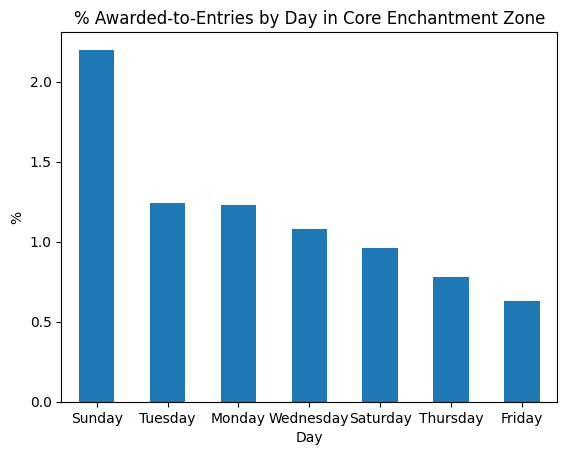

In [61]:
# Show bar chart of the total number of permits awared by day us df_core_awarded_by_day
import matplotlib.pyplot as plt

# Create a ratio between the total number of permits awarded by day and total number entries per day
df_core_awarded_by_day["Entries"] = df_split_core[
    "preferred_entry_date_day"
].value_counts()

df_core_awarded_by_day["%"] = round(
    (df_core_awarded_by_day["Awarded"] / df_core_awarded_by_day["Entries"]) * 100, 2
)

# Sort the dataframe by the "%" column
df_core_awarded_by_day = df_core_awarded_by_day.sort_values(by="%", ascending=False)

df_core_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Awarded-to-Entries by Day in Core Enchantment Zone")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()


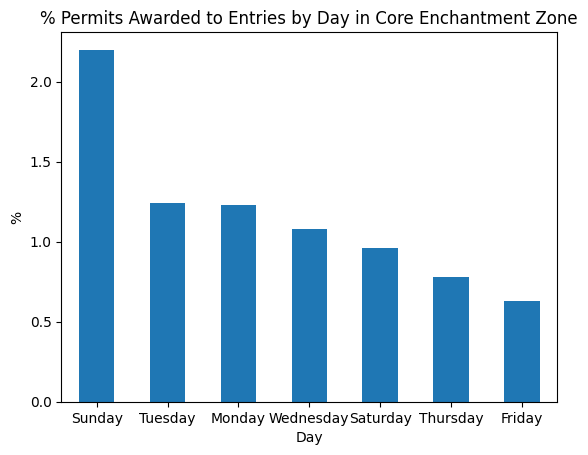

In [62]:
# Show bar chart of the total number of permits awared by day us df_core_awarded_by_day
import matplotlib.pyplot as plt

# Create a ratio between the total number of permits awarded by day and total number entries per day
df_core_awarded_by_day["Entries"] = df_split_core[
    "preferred_entry_date_day"
].value_counts()

df_core_awarded_by_day["%"] = round(
    (df_core_awarded_by_day["Awarded"] / df_core_awarded_by_day["Entries"]) * 100, 2
)

# Sort the dataframe by the "%" column
df_core_awarded_by_day = df_core_awarded_by_day.sort_values(by="%", ascending=False)

df_core_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Permits Awarded to Entries by Day in Core Enchantment Zone")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()

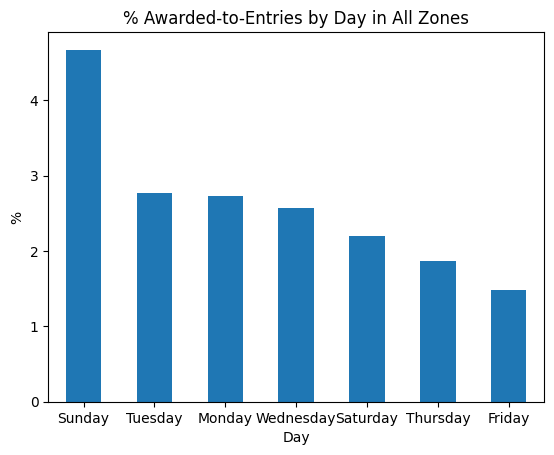

In [63]:
# Create a ratio between the total number of permits awarded by day and total number entries per day
df_awarded_by_day["Entries"] = df_split["preferred_entry_date_day"].value_counts()

df_awarded_by_day["%"] = round(
    (df_awarded_by_day["Total Awarded"] / df_awarded_by_day["Entries"]) * 100, 2
)

# Sort the dataframe by the "%" column
df_awarded_by_day = df_awarded_by_day.sort_values(by="%", ascending=False)

df_awarded_by_day["%"].plot(kind="bar", legend=False)
plt.title("% Awarded-to-Entries by Day in All Zones")
plt.ylabel("%")
plt.xlabel("Day")
plt.xticks(rotation=0)
plt.show()

In [64]:
df_awarded_by_day

,Total Awarded,Entries,%
preferred_entry_date_day,,,
Sunday,2246,48127,4.67
Tuesday,1694,61263,2.77
Monday,1864,68359,2.73
Wednesday,1677,65377,2.57
Saturday,1751,79661,2.20
Thursday,1711,91507,1.87
Friday,1730,116791,1.48
